# Mean and standard deviation

**Problem 3b.** In this task we consider a discrete distribution *without a mean* and verify whether we can still estimate the location of its peak by simply computing averages. Consider a discrete variable $X$ with the following distribution: $P(X=k) = \frac{1}{4|k|(|k|+1)}$ for $k \neq 0$ and $P(X=0) = \frac{1}{2}$. 
 * Argue that these formulas indeed describe a discrete distribution.
 * Show that $X$ does not have a mean.
 * Plot the function $f(k) = P(X=k)$ for $k \in [-10,10]$.
 * Write a function that samples from $X$'s distribution (imaginary bonus points if it is vectorized).
 * Generate $N=10\,000$ values $x_1,\ldots,x_n$ from the distribution.
 * For $i \in \{1,\ldots,n\}$ compute $\bar{x}_i = \frac{x_1+\ldots+x_i}{i}$. 
 * Plot the values of $\bar{x}_i$. Does it look like the series converges? If it is not clear, you can compute several independent
   $N$-means and plot a histogram, then increase $N$ significantly and see how it changes.
 * For $i \in \{1,\ldots,n\}$ compute $\hat{x}_i = \textrm{ median of }\{x_1,\ldots,x_i\}$. 
   You do not need to do it in a clever way (like in ASD lab).
 * Plot the values of $\hat{x}_i$. Does it look like the series converges? 
 * A more interesting situation would be the one where you a given a distribution like $X+c$ for unknown $c$, and 
   want to figure out what $c$ is, i.e. find the center of the distribution. Both methods above attempt to
   locate the center - which works better?

In [4]:
import numpy as np
import matplotlib.pyplot as plt 
import random
import math

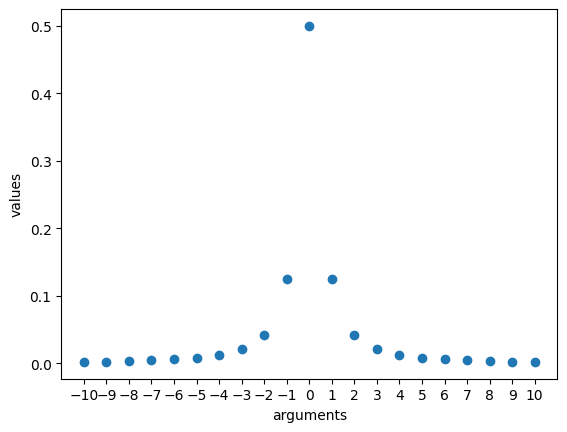

In [60]:
def P(k):
    if k == 0: 
        return 0.5
    return 1 / (4 * abs(k) * (abs(k) + 1))
k = np.arange(-10, 11)
distribution = np.array([P(i) for i in k])

plt.xticks(np.arange(-10, 11))
plt.plot(np.arange(-10, 11, 1), distribution, 'o')
plt.xlabel("arguments")
plt.ylabel("values")
plt.show()

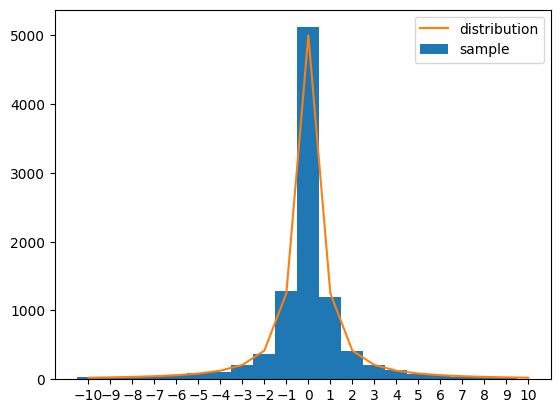

In [70]:
N = 10000

def get_sample(N):
    zero_one = np.random.randint(2, size=N)
    neg_pos = np.sign(np.random.rand(N) - 0.5)
    values = np.floor(1 / np.random.rand(N))
    return zero_one * neg_pos * values

sample = get_sample(N)
plt.xticks(np.arange(-10, 11))
plt.hist(sample, bins = [i + 0.5 for i in range(-11, 10)])
plt.plot(np.arange(-10, 11), distribution * N)
plt.legend(['distribution', 'sample'])
plt.show()

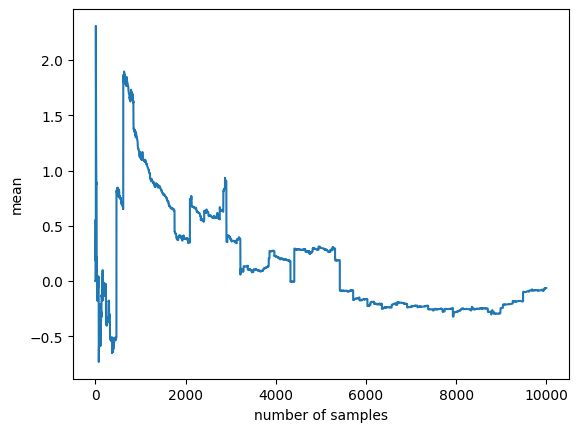

In [63]:
N = 10000

sample = get_sample(N)

def get_mean(sample):
    cumsum = np.cumsum(sample)
    div = np.arange(1, N + 1)
    return cumsum/div

mean = get_mean(sample)
    
plt.plot(np.array(mean))
plt.xlabel("number of samples")
plt.ylabel("mean")
plt.show()

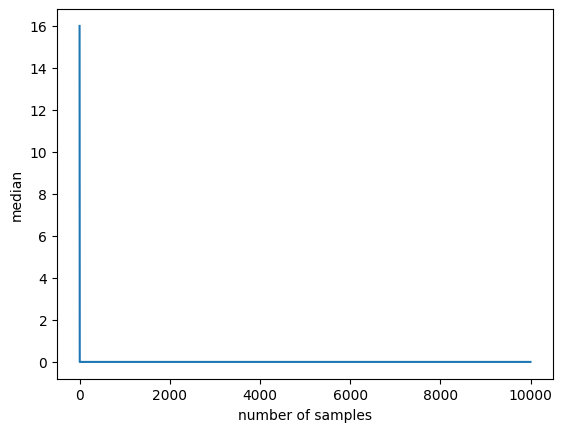

In [59]:
N = 10000

sample = get_sample(N)
median = []
for i in range(N):
    median.append(np.median(sample[:(i + 1)]))
    
plt.plot(np.array(median))
plt.xlabel("number of samples")
plt.ylabel("median")
plt.show()
    